<a href="https://colab.research.google.com/github/martinparlanti/Portfolios-with-ETFs/blob/main/Portafolio_de_inversi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
!pip install git+https://github.com/stefan-jansen/pyfolio-reloaded.git

  Cloning https://github.com/stefan-jansen/pyfolio-reloaded.git to /tmp/pip-req-build-7dx615ja
  Running command git clone --filter=blob:none --quiet https://github.com/stefan-jansen/pyfolio-reloaded.git /tmp/pip-req-build-7dx615ja
  Resolved https://github.com/stefan-jansen/pyfolio-reloaded.git to commit 6b55da7fce365e325046bb080cb13ced1822de95
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [39]:
import pandas as pd
import yfinance as yf
import datetime as date
import matplotlib.pyplot as plt
import pyfolio as pf

In [40]:
def get_data(index):
  data = yf.download(index, start='2024-01-01', end='2025-01-01')
  return data

In [41]:
amzn = get_data('AMZN')
tsla = get_data('TSLA')
spy = get_data('^GSPC')

amzn.head()

/tmp/ipython-input-2929852231.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(index, start='2024-01-01', end='2025-01-01')
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2929852231.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(index, start='2024-01-01', end='2025-01-01')
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2929852231.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(index, start='2024-01-01', end='2025-01-01')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,
2024-01-02,149.929993,152.380005,148.389999,151.539993,47339400
2024-01-03,148.470001,151.050003,148.330002,149.199997,49425500
2024-01-04,144.570007,147.380005,144.050003,145.589996,56039800
2024-01-05,145.240005,146.589996,144.529999,144.690002,45153100
2024-01-08,149.100006,149.399994,146.149994,146.740005,46757100


In [42]:
amzn.rename(columns={'Close': 'Adj Close'}, inplace=True)
tsla.rename(columns={'Close': 'Adj Close'}, inplace=True)
spy.rename(columns={'Close': 'Adj Close'}, inplace=True)

# Display the first few rows of the amzn DataFrame to show the renamed column
display(amzn.head())

Price,Adj Close,High,Low,Open,Volume
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,
2024-01-02,149.929993,152.380005,148.389999,151.539993,47339400
2024-01-03,148.470001,151.050003,148.330002,149.199997,49425500
2024-01-04,144.570007,147.380005,144.050003,145.589996,56039800
2024-01-05,145.240005,146.589996,144.529999,144.690002,45153100
2024-01-08,149.100006,149.399994,146.149994,146.740005,46757100


In [43]:
for stock in (amzn,tsla,spy):
  stock['Returns'] = stock['Adj Close']/stock['Adj Close'].iloc[0]
amzn.head()


Price,Adj Close,High,Low,Open,Volume,Returns
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN,
Date,,,,,,
2024-01-02,149.929993,152.380005,148.389999,151.539993,47339400,1.000000
2024-01-03,148.470001,151.050003,148.330002,149.199997,49425500,0.990262
2024-01-04,144.570007,147.380005,144.050003,145.589996,56039800,0.964250
2024-01-05,145.240005,146.589996,144.529999,144.690002,45153100,0.968719
2024-01-08,149.100006,149.399994,146.149994,146.740005,46757100,0.994464


In [44]:
for stock, allocation in zip((amzn,tsla,spy),(.2,.4,.4)):
  stock['allocation'] = stock['Returns']*allocation
amzn.head()

Price,Adj Close,High,Low,Open,Volume,Returns,allocation
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN,,
Date,,,,,,,
2024-01-02,149.929993,152.380005,148.389999,151.539993,47339400,1.000000,0.200000
2024-01-03,148.470001,151.050003,148.330002,149.199997,49425500,0.990262,0.198052
2024-01-04,144.570007,147.380005,144.050003,145.589996,56039800,0.964250,0.192850
2024-01-05,145.240005,146.589996,144.529999,144.690002,45153100,0.968719,0.193744
2024-01-08,149.100006,149.399994,146.149994,146.740005,46757100,0.994464,0.198893


In [45]:
for stock in (amzn,tsla,spy):
  stock['position'] = stock['allocation']*1000
  stock['strategy'] = stock['position'].cumsum()
amzn.head()

Price,Adj Close,High,Low,Open,Volume,Returns,allocation,position,strategy
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN,,,,
Date,,,,,,,,,
2024-01-02,149.929993,152.380005,148.389999,151.539993,47339400,1.000000,0.200000,200.000000,200.000000
2024-01-03,148.470001,151.050003,148.330002,149.199997,49425500,0.990262,0.198052,198.052436,398.052436
2024-01-04,144.570007,147.380005,144.050003,145.589996,56039800,0.964250,0.192850,192.850016,590.902452
2024-01-05,145.240005,146.589996,144.529999,144.690002,45153100,0.968719,0.193744,193.743764,784.646215
2024-01-08,149.100006,149.399994,146.149994,146.740005,46757100,0.994464,0.198893,198.892835,983.539050


In [48]:
portfolio = pd.concat([amzn['position'],tsla['position'],spy['position']],axis=1)
portfolio.columns = ['AMZN','TSLA','SPY']
portfolio.head()

,AMZN,TSLA,SPY
Date,,,
2024-01-02,200.000000,400.000000,400.000000
2024-01-03,198.052436,383.946540,396.793474
2024-01-04,192.850016,383.109241,395.433115
2024-01-05,193.743764,382.400785,396.155051
2024-01-08,198.892835,387.166893,401.746633


In [49]:
portfolio_total = portfolio.sum(axis=1)
portfolio_total.head()

,0
Date,
2024-01-02,1000.000000
2024-01-03,978.792450
2024-01-04,971.392372
2024-01-05,972.299600
2024-01-08,987.806360


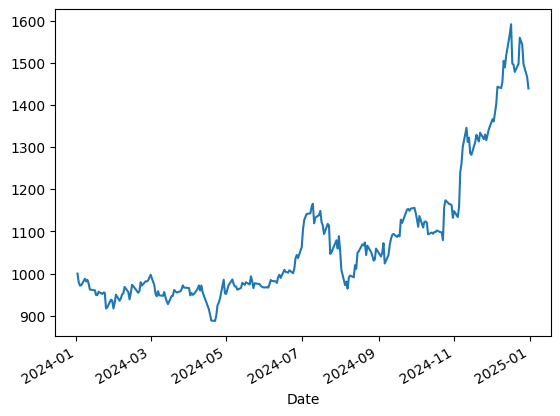

In [51]:
portfolio_total.plot()
plt.show()

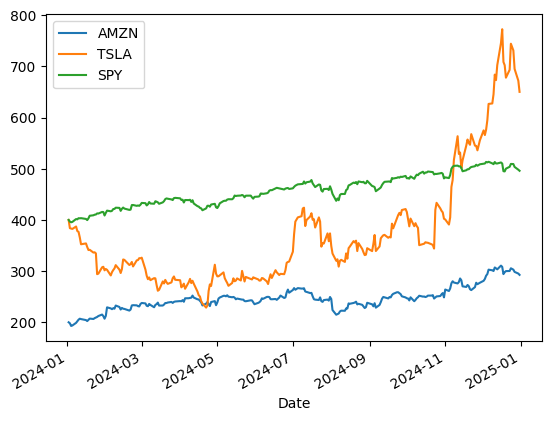

In [52]:
portfolio.plot()
plt.show()

In [53]:
portfolio_returns = portfolio_total.pct_change().dropna()
portfolio_returns.head()

,0
Date,
2024-01-03,-0.021208
2024-01-04,-0.007560
2024-01-05,0.000934
2024-01-08,0.015949
2024-01-09,-0.006485


/usr/local/lib/python3.12/dist-packages/pyfolio/plotting.py:670: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '44.104%' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  perf_stats.loc[stat, column] = str(np.round(value * 100, 3)) + "%"


Start date,2024-01-03
End date,2024-12-31
Total months,11
,Backtest
Annual return,44.104%
Cumulative returns,43.895%
Annual volatility,28.315%
Sharpe ratio,1.43
Calmar ratio,2.56
Stability,0.73
Max drawdown,-17.258%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,17.26,2024-07-10,2024-08-07,2024-10-25,78
1,10.98,2024-03-01,2024-04-22,2024-06-13,75
2,9.57,2024-12-17,2024-12-31,NaT,NaN
3,7.14,2024-01-08,2024-01-25,2024-02-29,39
4,4.74,2024-11-11,2024-11-15,2024-12-02,16


/usr/local/lib/python3.12/dist-packages/pyfolio/plotting.py:1407: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Daily", "Weekly", "Monthly"])
/usr/local/lib/python3.12/dist-packages/pyfolio/tears.py:1005: UserWarning: Passed returns do not overlap with anyinteresting times.
  warnings.warn(


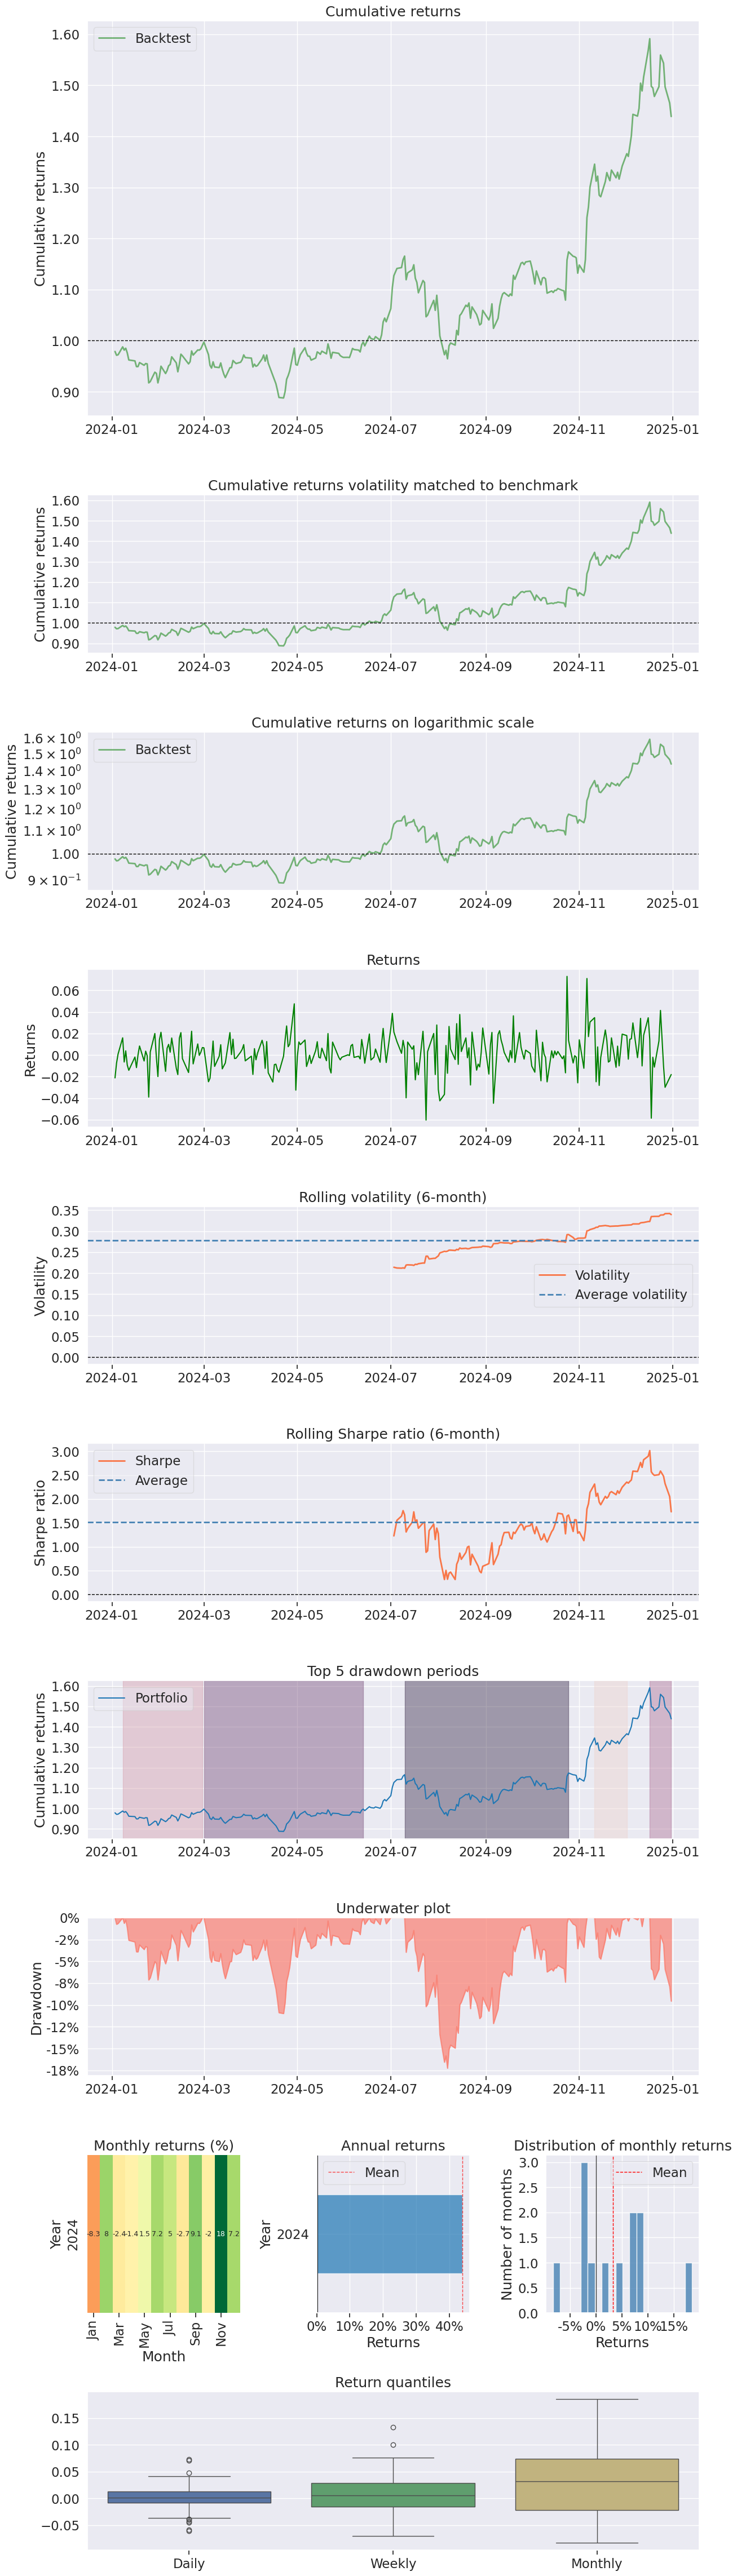

In [56]:
pf.create_full_tear_sheet(portfolio_returns)